# Deeper Neural Networks

## Introduction

Some of the most powerful neural networks use many dozens of layers of activation functions in order to model complex relationships. Let's see how we can extend neural networks even further with deeper neural networks!

## Objectives
You will be able to:

- Explain the mechanics of a deep neural network 
- Explain the purpose of an activation function in a neural network 
- List the different activation functions  
- Compare and contrast the different activation functions 


Let's look back at our logistic regression neural network example. In the image below, we represented what the forward propagation flow looks like. Now there is one important thing to notice, and that is that this logistic regression neural network is actually *extremely shallow*, as there are **no hidden layers**! How so? 

<img src="./images/new_log_reg.png" width=600>

In fact, what exactly does a neuron in a neural network do? The purpose of a neuron is 2-fold: 
- transforms the inputs doing a linear transformation (generally $ w x+b$)
- uses an activation function (generally sigmoid, or another activation function)

A more correct representation of the neural network is then as follows:

<img src='images/new_small_log.png' width='40%'>

This means that there is only **one neuron** in the logistic regression neural network -- basically a neuron in the output layer. It takes inputs that we *know*, and it directly outputs the observed output, with no layers in between. If this is the case, the neural network is a **1-layer neural network**.

To make it even more clear, let's look at the network on the left below, which you might remember from a previous lesson. You can think of this network as a logistic regression-kind neural network, but with an extra layer plugged in with four nodes. This extra layer is a hidden layer, because we do *not directly observe the output of this layer*. This network is a **2-layer neural network**, or a neural network with 1 hidden layer.

<img src='images/new_two_network.png'>

Why is this picture on the left hand side a 2-layer neural network? Don't we see 3 layers of nodes? Well, technically, the input layer is not a layer: no transformations happen here, it's simply a layer of inputs. That's why we included the example on the right hand side above. This is basically (again) another way of representing the logistic regression example, the same type of network as the one you've seen in the image right before. Sometimes the input layer will be denoted with actual nodes, sometimes it won't. Just remember that this layer does not count as an *actual* layer. When we refer to it, we'll say it's layer with index 0.

## Deeper network notation

<img src='images/new_small_deeper.png' width='700'>

Let's look at this network going forward. With deeper networks, we'll need to introduce new notation. Generally, the output of layer $j$ is denoted as $a^{[j]}$.

For our 2-layer neural network above, this means that:

- $x = a^{[0]}$  as x is what comes out of the input layer
- $a^{[1]} = \begin{bmatrix} a^{[1]}_1  \\ a^{[1]}_2 \\ a^{[1]}_3  \\\end{bmatrix}$ is the value generated by the hidden layer
- $\hat y =  a^{[2]}$, the output layer will generate a value $a^{[2]}$, which is equal to $\hat y$ 


Remember that in each of the nodes in the hidden layer, a linear transformation will take place, as well as a transformation because of an activation function. 

Let's look at the first node in the hidden layer. The linear transformation that takes place is $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$, and the activation  $a^{[1]}_1= f(z^{[1]}_1)$. Notice how we use $f$ here instead of $\sigma$. In fact, we don't have to use the sigmoid as an activation function, there are numerous other options!

extending this to the two other nodes in the hidden layer, this gets us to the following equations for the hidden layer:

$ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$ and  $a^{[1]}_1= f(z^{[1]}_1)$

$ z^{[1]}_2 = w^{[1]}_2 x +b^{[1]}_2$ and $a^{[1]}_2= f(z^{[1]}_2)$

$ z^{[1]}_3 = w^{[1]}_3 x +b^{[1]}_3$ and $a^{[1]}_3= f(z^{[1]}_3)$

Now, let's discuss the dimensions of all these elements.

$w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$


where, eg. $w^{[1]}_{1,2}$ denotes the weight of the arrow going from $x_2$ into the first note of the hidden layer. 

When multiplying the transposed (making it a 2 x 3 matrix) of this matrix $w^{[1]T}_1$ with $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix}$

and add $b^{[1]} = \begin{bmatrix} b^{[1]}_1  \\b^{[1]}_2 \\ b^{[1]}_3 \end{bmatrix}$, we obtain $z^{[1]} = \begin{bmatrix} z^{[1]}_1  \\z^{[1]}_2 \\ z^{[1]}_3 \end{bmatrix}$. Similarly, we have $a^{[1]} = \begin{bmatrix} a^{[1]}_1  \\a^{[1]}_2 \\ a^{[1]}_3 \end{bmatrix}$ and corresponding sigmoid functions.

Now, let's try and move forward in our network. Recall that 

$x = \begin{bmatrix} x_1  \\x_2\end{bmatrix} \equiv a^{[0]}$ and that $a^{[2]} = \hat y$ 

Then, given input $x$:

$z^{[1]} = w^{[1]T} a^{[0]} + b^{[1]}$

$a^{[1]} = f(z^{[1]})$

$z^{[2]} = w^{[2]T} a^{[1]} + b^{[2]}$

$a^{[2]} = f(z^{[1]})$

**Some questions to think about** 
- What are the dimensions of the matrices associated here?
- The 4 expressions above don't take into account several training samples. Imagine we use a superscript (i). How do you rewrite these expressions?

$z^{[1](i)} = w^{[1]T} a^{[0](i)} + b^{[0]}$

$a^{[1](i)} = f(z^{[1](i)})$

$z^{[2](i)} = w^{[2]T} a^{[1](i)} + b^{[2]}$

$a^{[2](i)} = f(z^{[1](i)})$

In the lab, you'll learn how to vectorize this!

## Activation functions

Until now, we've only discussed the sigmoid activation function. The sigmoid function is nearly always the go-to in the output layer of a binary classification problem, but in hidden layers, there are many other possible activation functions. In the code block below, you can find some functions we created so we can plot them below. Note that we plot the actual activation functions as well as their derivatives!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if (derivative == True):
        return f * (1 - f)
    return f

def tanh(x, derivative=False):
    f = np.tanh(x)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = 0
    return f

def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i]* leakage
    return f

def arctan(x, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(x))
    return np.arctan(x)

z = np.arange(-10, 10, 0.2)

## The sigmoid function 

Let's have a look at the sigmoid again. Recall that the mathematical expression of the sigmoid is $ a=\dfrac{1}{1+ \exp(-z)}$, and this outputs activation values somewhere between 0 and 1. 

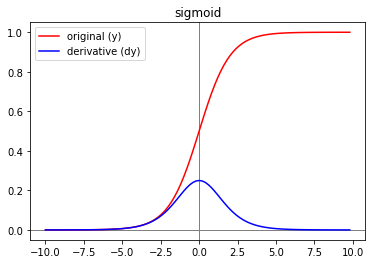

In [2]:
y = sigmoid(z)
dy = sigmoid(z, derivative=True)
plt.title('sigmoid')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

## The hyperbolic tangent (tanh) function 

The hyperbolic tangent (or tanh) function goes between -1 and +1, and is in fact a shifted version of the sigmoid function, with formula $ a=\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$. For intermediate layers, the tanh function generally performs pretty well because, with values between -1 and +1, the means of the activations coming out are closer to zero! 

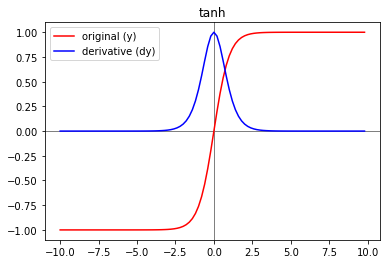

In [3]:
y = tanh(z)
dy = tanh(z, derivative=True)
plt.title('tanh')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

A disadvantage of both tanh and sigmoid activation functions is that when $z$ gets quite large or small, the derivative of the slopes of these functions become very small, generally 0.0001. This will slow down gradient descent. You can see in the tanh plot that this already starts happening for values of $z > 2$ or $z < 2$. The next few activation functions will try to overcome this issue. 

## The inverse tangent (arctan) function 

The inverse tangent (arctan) function has a lot of the same qualities that tanh has, but the range roughly goes from -1.6 to 1.6, and  the slope is more gentle than the one we saw using the tanh function.

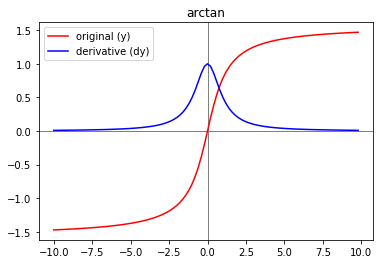

In [4]:
y = arctan(z)
dy = arctan(z, derivative = True)
plt.title('arctan')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

## The Rectified Linear Unit function 

This is probably the most popular activation function, along with the tanh! The fact that the activation is exactly 0 when $z <0$  is slightly cumbersome when taking derivatives though. 

$$a=\max(0, z)$$

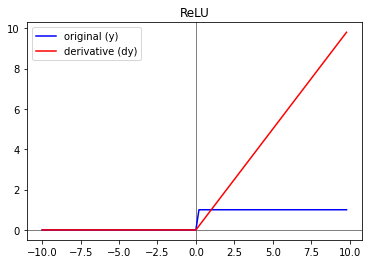

In [4]:
plt.title('ReLU')
y = relu(z)
dy = relu(z, derivative=True)
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, dy, 'b', label='original (y)')
plt.plot(z, y, 'r', label='derivative (dy)')
plt.legend();

## The leaky Rectified Linear Unit function 

The leaky ReLU solves the derivative issue by allowing for the activation to be slightly negative when $z <0$. 

$$a=\max(0.001*z ,z)$$

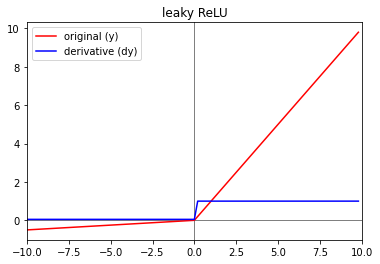

In [5]:
# the default leakage here is 0.05!
y = leaky_relu(z)
dy = leaky_relu(z, derivative=True)
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.title('leaky ReLU')
plt.xlim(-10,10)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

## Additional Resources 

- [Visualising activation functions in neural networks](https://dashee87.github.io/data%20science/deep%20learning/visualising-activation-functions-in-neural-networks/)


## Summary 

In this lecture, you obtained a better intuition on how "deeper" neural networks work, and you learned about some very important notation that will be used when building deeper networks. Additionally, you learned about activation functions other than the sigmoid function, and what their derivatives look like.